In [1]:
#Importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
#Read the datafile

df = pd.read_csv("clean_kaggle_data.csv", low_memory=False)

df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,20024,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
10725,20029,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
10726,20033,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10727,20034,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


### 1. Data exploratory analysis. In this section, Gender VS Education Level, Gender VS Salary, and age are analyzed and corresponding figures are presented.

a. Plot a bar graph comparing gender vs. education level

In [3]:
# 1) Check how many categories exist for gender and the frequency of each category

print(df['Q2'].value_counts())

#Convert the series to a numpy array
gender = df['Q2'].value_counts().to_numpy()
print("\n", gender)

Man                        8872
Woman                      1683
Prefer not to say           131
Prefer to self-describe      23
Nonbinary                    20
Name: Q2, dtype: int64

 [8872 1683  131   23   20]


In [4]:
# 2) Check how many categories exist for education level

print(df['Q4'].value_counts())

#Convert the series to a numpy array
edu = df['Q4'].value_counts().to_numpy()
print("\n", edu)

Master’s degree                                                      4879
Bachelor’s degree                                                    3013
Doctoral degree                                                      1718
Professional degree                                                   470
Some college/university study without earning a bachelor’s degree     385
I prefer not to answer                                                158
No formal education past high school                                  106
Name: Q4, dtype: int64

 [4879 3013 1718  470  385  158  106]


In [5]:
# 3) Extract data based on gender (man and woman ONLY)

data1 = df[['Q2','Q4']] #Extracting the gender and education level columns
man_edu = data1[data1.Q2 == "Man"] #Extracting rows with man ONLY
woman_edu = data1[data1.Q2 == "Woman"] #Extracting rows with woman ONLY

man_edu_val = man_edu['Q4'].value_counts().to_numpy()
woman_edu_val = woman_edu['Q4'].value_counts().to_numpy()

In [6]:
data = np.asarray([man_edu_val, woman_edu_val])
data

array([[4025, 2519, 1378,  388,  339,  122,  101],
       [ 787,  451,  305,   76,   37,   23,    4]])

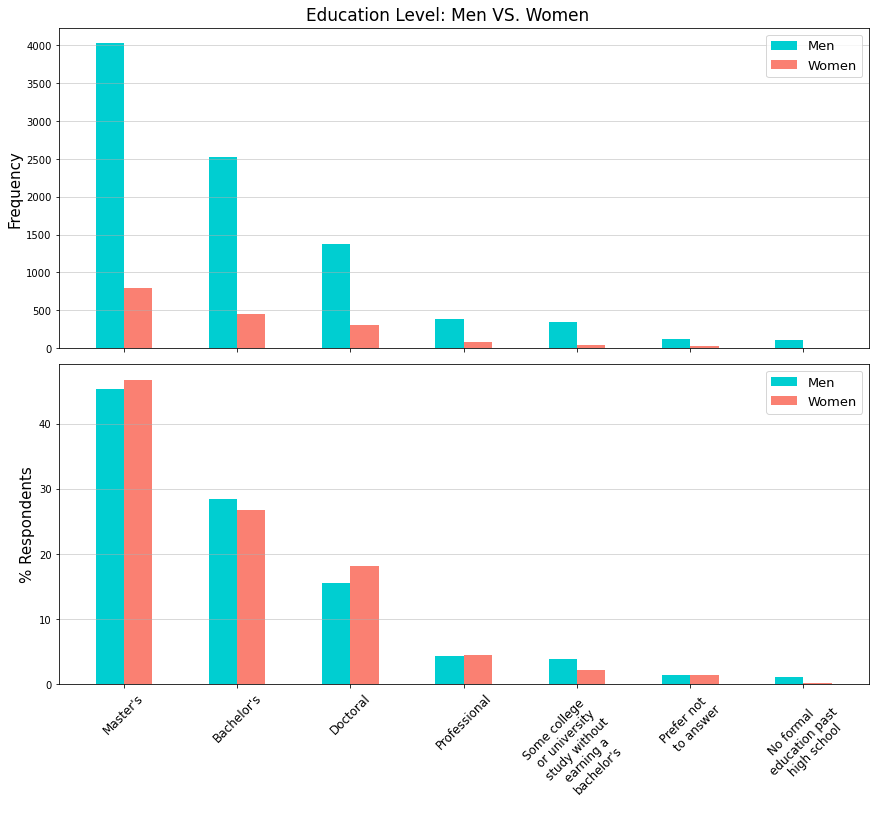

In [7]:
# 4) Plotting

edu_cat = ["Master's","Bachelor's","Doctoral","Professional", 
           "Some college \n or university \n study without \n earning a \nbachelor's", 
           "Prefer not \n to answer","No formal \n education past \n high school"] #Define a list of labels for defining x ticks

X = np.arange(len(edu_cat)) #define tick values

#Plot the bar graph

# Calculate % respondent for each education level
man_perc = data[0]/8872*100
woman_perc = data[1]/1683*100

fig,ax = plt.subplots(2, sharex=True, figsize=(12,10))
#ax = fig.add_axes([0,0,1,1])
fig1 = ax[0].bar(X-0.125, data[0], color = 'darkturquoise', width = 0.25, label = "Men")
fig2 = ax[0].bar(X+0.125, data[1], color = 'salmon', width = 0.25, label = "Women")
fig3 = ax[1].bar(X-0.125, man_perc, color = 'darkturquoise', width=0.25, label = "Men")
fig4 = ax[1].bar(X+0.125, woman_perc, color = 'salmon', width=0.25, label = "Women")
fig.tight_layout()

#Format the plot area
ax[0].grid(axis='y', alpha=0.6)
ax[1].grid(axis='y', alpha=0.6)
ax[0].legend(loc="upper right", fontsize=13)
ax[1].legend(loc="upper right", fontsize=13)
ax[1].set_xticks(X)
ax[1].set_xticklabels(edu_cat, rotation = 45, fontsize = 12)
ax[0].set_ylabel("Frequency", fontsize=15)
ax[1].set_ylabel("% Respondents", fontsize=15)
fig.suptitle("Education Level: Men VS. Women", fontsize=17)
fig.subplots_adjust(top=0.95)

plt.show()

b. Plot a histogram showing the distribution of salary grouped by men and women

In [8]:


# 1) Extract data based on gender (man and woman ONLY)

data2 = df[['Q2','Q24']] #Extracting the gender and salary columns
man_sal = data2[data2.Q2 == "Man"] #Extracting rows with man ONLY
woman_sal = data2[data2.Q2 == "Woman"] #Extracting rows with woman ONLY


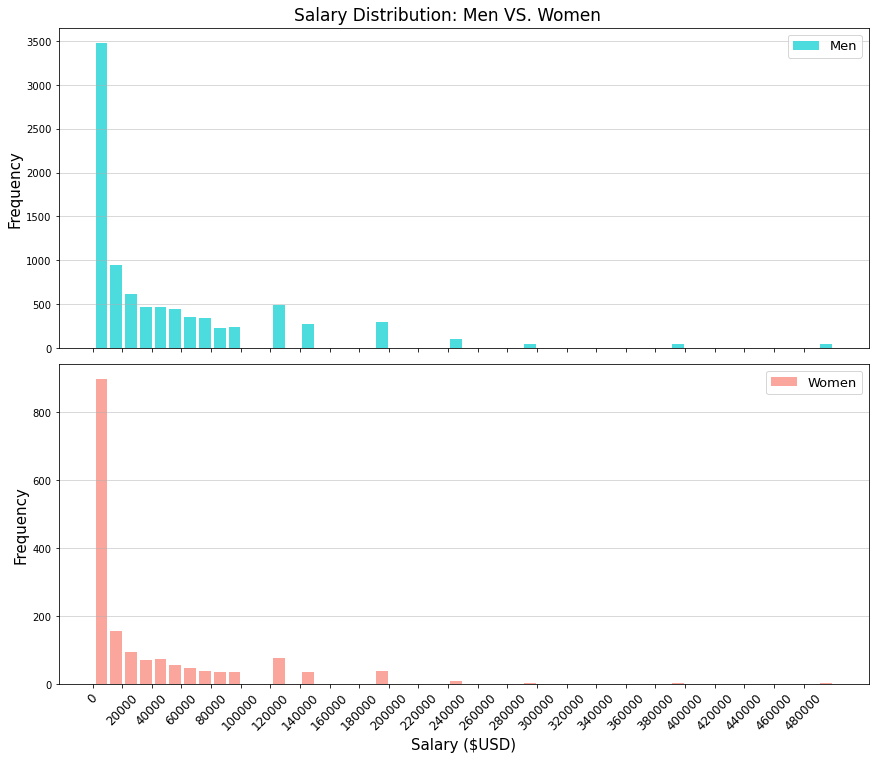

In [9]:
# 2) Plot the distribution of salary among men and women

fig,ax = plt.subplots(2, sharex=True, figsize=(12,10))
ax[0].hist(man_sal['Q24'], bins=50, alpha=0.7, rwidth=0.8,
                color = 'darkturquoise', label="Men")
ax[1].hist(woman_sal['Q24'], bins=50, alpha=0.7, rwidth=0.8,
                color = 'salmon', label="Women")
fig.tight_layout()

#Formatting plot area
ax[0].grid(axis='y', alpha=0.6)
ax[1].grid(axis='y', alpha=0.6)
ax[0].set_ylabel("Frequency", fontsize=15)
ax[1].set_ylabel("Frequency", fontsize=15)
ax[0].legend(loc="upper right", fontsize=13)
ax[1].legend(loc="upper right", fontsize=13)
plt.xticks(np.arange(min(df['Q24'])-1000, max(df['Q24']), 20000), fontsize=12, rotation=45)
plt.rc('ytick',labelsize=10)
plt.xlabel("Salary ($USD)", fontsize=15)
fig.suptitle("Salary Distribution: Men VS. Women", fontsize=17)
fig.subplots_adjust(top=0.95)

plt.show() 

c. Plot a bar graph showing age, grouped by gender

In [10]:
# 1) Check how many categories exist for age and the frequency of each category

age_data = df['Q1'].value_counts()
age_data

25-29    2350
30-34    1979
35-39    1467
22-24    1424
40-44    1042
45-49     771
50-54     536
18-21     498
60-69     309
55-59     301
70+        52
Name: Q1, dtype: int64

In [11]:
# 2) Extract data based on gender (man and woman ONLY)

data3 = df[['Q1','Q2']] #Extracting the age, gender
man_age = data3[data3.Q2 == "Man"] #Extracting rows with man ONLY
woman_age = data3[data3.Q2 == "Woman"] #Extracting rows with woman ONLY

man_age_val = man_age['Q1'].value_counts().to_numpy()
woman_age_val = woman_age['Q1'].value_counts().to_numpy()

print(man_age_val)
print(woman_age_val)

[1897 1648 1210 1109  881  674  468  382  286  267   50]
[416 299 292 234 147 103  82  61  25  22   2]


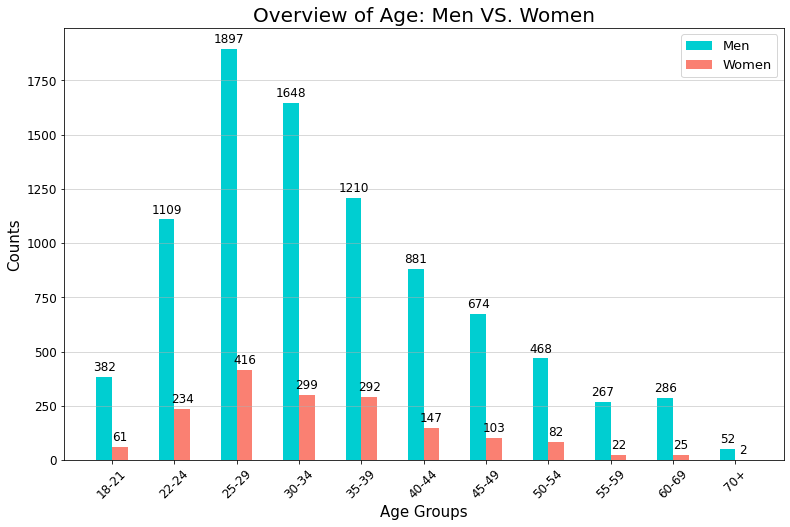

In [12]:
# 3) Plot the bar graph

#Define a list of labels for defining x ticks
age_cat = ["18-21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","70+"] 

#Sort the age counts from the youngest to oldest
man_age_sorted = [382,1109,1897,1648,1210,881,674,468,267,286,52] 
woman_age_sorted = [61,234,416,299,292,147,103,82,22,25,2]

Y = np.arange(len(age_cat)) #define xtick values

#Plot the bar graph
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
fig3 = ax.bar(Y-0.125, man_age_sorted, color = 'darkturquoise', width = 0.25)
fig4 = ax.bar(Y+0.125, woman_age_sorted, color = 'salmon', width = 0.25)

#Format the plot area
ax.grid(axis='y', alpha=0.6)
ax.legend(labels=['Men', 'Women'], fontsize = 13)
ax.set_xticks(Y)
ax.set_xticklabels(["18-21","22-24","25-29","30-34","35-39","40-44",
                    "45-49","50-54","55-59","60-69","70+"], rotation = 45, fontsize = 12)
plt.yticks(fontsize=12)
plt.xlabel("Age Groups", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("Overview of Age: Men VS. Women", fontsize=20)

#Adding annotation to the plot
def autolabel(figs):
    for values in figs:
        height = values.get_height()
        ax.annotate('{}'.format(height),
                    xy=(values.get_x() + values.get_width()/2, height),
                    xytext=(0, 3),  #3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)
        
autolabel(fig3)
autolabel(fig4)

plt.show()

### 2. Estimating the difference between average salary (Q24) of men vs. women (Q2)

a. Compute and report descriptive statistics for each group (remove missing data if necessary)

In [13]:
# Putting men and women salary data into dataframes
man_sal_df = pd.DataFrame(data=man_sal['Q24'])
woman_sal_df = pd.DataFrame(data=woman_sal['Q24'])

# Checking again if there are missing values
man_missing = man_sal_df["Q24"].isnull().sum()
woman_missing = woman_sal_df["Q24"].isnull().sum()

# Checking the number of valid datapoints for men and women salary after removing missing values if necessary
man_sal_df = man_sal_df.dropna()
woman_sal_df = woman_sal_df.dropna()
man_valid = man_sal_df['Q24'].count()
woman_valid = woman_sal_df['Q24'].count()

# Calculate the mean for each group
man_mean = np.mean(man_sal_df['Q24'])
woman_mean = np.mean(woman_sal_df['Q24'])

# Calculate the standard deviation for each group
man_sd = np.std(man_sal_df['Q24'])
woman_sd = np.std(woman_sal_df['Q24'])

# Calculate the median for each group
man_med = np.median(man_sal_df['Q24'])
woman_med = np.median(woman_sal_df['Q24'])

# Finding the min and max value for each group
man_max = man_sal_df['Q24'].max()
man_min = man_sal_df['Q24'].min()
woman_max = woman_sal_df['Q24'].max()
woman_min = woman_sal_df['Q24'].min()

# Calculating percentile for each group
man_25p = np.percentile(man_sal_df['Q24'], 25)
man_75p = np.percentile(man_sal_df['Q24'], 75)
woman_25p = np.percentile(woman_sal_df['Q24'], 25)
woman_75p = np.percentile(woman_sal_df['Q24'], 75)

# Putting all descriptive data into a dataframe
man_des = [man_missing, man_valid, man_max, man_min, man_mean, man_sd, man_med, man_25p, man_75p]
man_des = np.array(man_des).reshape(-1,1)
woman_des = [woman_missing, woman_valid, woman_max, woman_min, woman_mean, woman_sd, woman_med, woman_25p, woman_75p]

report_df = pd.DataFrame(data=man_des, columns=['Men'], index=['Missing Data', 'Valid Data', 'Maximum', 'Minimum',
                                                                  'Mean', 'Standard Deviation', 'Median', '25 Percentile', '75 Percentile'])
report_df['Women'] = woman_des

report_df


,Men,Women
Missing Data,0.000000,0.000000
Valid Data,8872.000000,1683.000000
Maximum,500000.000000,500000.000000
Minimum,1000.000000,1000.000000
Mean,50750.619928,36417.112299
Standard Deviation,70344.010094,59425.053720
Median,25000.000000,7500.000000
25 Percentile,3000.000000,1000.000000
75 Percentile,70000.000000,50000.000000


b. If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.

It is deemed that a t-test is not suitable here because a t-test assumes normality and homogeneity of the variance.

First of all, as shown in the histograms in Q1, the salary of men and women are not normally distributed but skewed towards the left. One main assumption of t-test is that the data have to have a normal distribution. Since this assumption is not met, a t-test would not provide reliable results here. 

Secondly, another assumption of t-test is the homogeneity of variance - meaning that the variance of the two groups should be homogenous/equal. Using the Levene test for testing variance homogeneity (demonstrated below), we can see the calculated p valud is smaller than 0.05, therefore we conclude that no homogeneity exists between the variance of men's and women's salary.

In conclusion, a t-test is not suitable here and therefore is not performed.

In [14]:
# Checking variance homogeneity using Levene test with a 0.05 confidence level

w_sal, p_sal = stats.levene(man_sal_df['Q24'], woman_sal_df['Q24'])

print ("\nLevene test: W = %g  p = %g" % (w_sal, p_sal))

if p_sal < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of men's and women's salary.")
      


Levene test: W = 42.4153  p = 7.71697e-11

Since the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of men's and women's salary.


c. Bootstrap your data for comparing the mean of salary for men and women. Use 1000 replications. Plot two bootstrap distributions (for men and women) and the distribution of the differences 

In [15]:
# Define empty arrays to store the mean values of bootstrap samples
boot_means_man = []
boot_means_woman = []
boot_med_man = []
boot_med_woman = []

np.random.seed(0)

# Perform bootstrapping
for num in range(1000):
    bootsample_man = np.random.choice(man_sal_df['Q24'], size=len(man_sal_df['Q24']), replace=True)
    bootsample_woman = np.random.choice(woman_sal_df['Q24'], size=len(woman_sal_df['Q24']), replace=True)
    
    boot_means_man.append(bootsample_man.mean())
    boot_means_woman.append(bootsample_woman.mean())
    
    boot_med_man.append(np.median(bootsample_man))
    boot_med_woman.append(np.median(bootsample_woman))

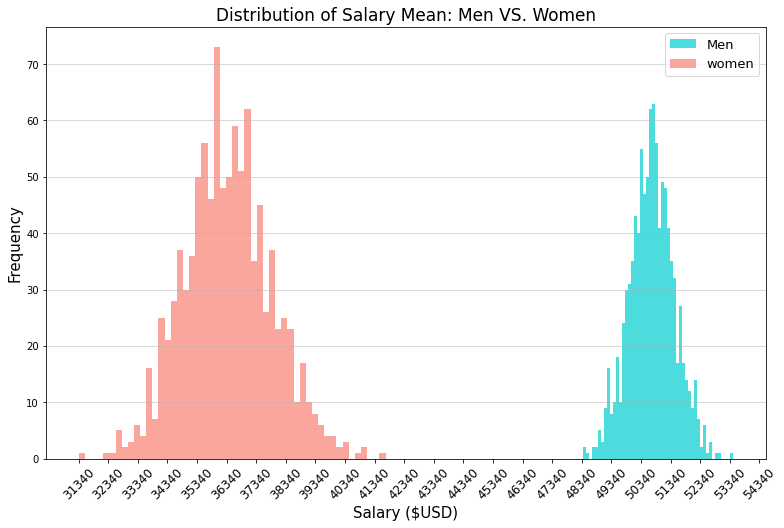

In [16]:
# Plotting the distribution of the means of men and women salary

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.hist(boot_means_man, bins=50, alpha=0.7, rwidth=1,
                color = 'darkturquoise', label="Men")
ax.hist(boot_means_woman, bins=50, alpha=0.7, rwidth=1,
                color = 'salmon', label="women")


#Formatting plot area
ax.grid(axis='y', alpha=0.6)
ax.set_ylabel("Frequency", fontsize=15)
ax.legend(loc="upper right", fontsize=13)
plt.xticks(np.arange(min(boot_means_woman), max(boot_means_man)+1048, 1000), fontsize=12, rotation=45)
plt.rc('ytick',labelsize=14)
plt.xlabel("Salary ($USD)", fontsize=15)
plt.title("Distribution of Salary Mean: Men VS. Women", fontsize=17)

plt.show() 

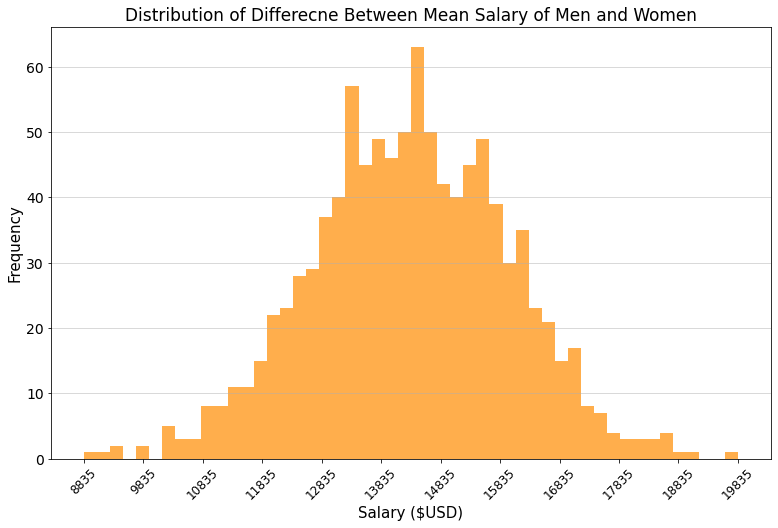

In [17]:
# Plotting the difference of the mean of men and women salary

# Converting the output to arrays

boot_means_man_ar = np.array(boot_means_man).reshape(-1,1)
boot_means_woman_ar = np.array(boot_means_woman).reshape(-1,1)

# Determining the difference between mean salary of men and mean salary of women
dif_means = boot_means_man_ar - boot_means_woman_ar

# Plotting the distribution of the means of men and women salary

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.hist(dif_means, bins=50, alpha=0.7, rwidth=1,
                color = 'darkorange')

#Formatting plot area
ax.grid(axis='y', alpha=0.6)
ax.set_ylabel("Frequency", fontsize=15)
plt.xticks(np.arange(min(dif_means), max(dif_means), 1000), fontsize=12, rotation=45)
plt.rc('ytick',labelsize=14)
plt.xlabel("Salary ($USD)", fontsize=15)
plt.title("Distribution of Differecne Between Mean Salary of Men and Women", fontsize=17)

plt.show() 

d. If suitable, perform a two-sample t-test on the bootstrap data with a 0.05 threshold.

In [18]:
# Checking variance homogeneity using Levene test with a 0.05 confidence level

w_boot_sal, p_boot_sal = stats.levene(boot_means_man, boot_means_woman)

print ("\nLevene test: W = %g  p = %g" % (w_boot_sal, p_boot_sal))

if p_boot_sal < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of men's and women's salary.")
      


Levene test: W = 323.877  p = 3.15929e-67

Since the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of men's and women's salary.


Because no homogeneity exists between the variance of men's and women's salary, Welch's t-test is used here as it assumes unequal variance.

In [19]:
# Welch's t-test, assuming unequal variance
tc1_welch, pc1_welch = stats.ttest_ind(boot_means_man_ar, boot_means_woman_ar, equal_var=False)

print ("\nWelch's t-test: t = %g  p = %g" % (tc1_welch, pc1_welch))

if pc1_welch < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that men and women have differnet \nsalary means.")
    
    


Welch's t-test: t = 273.455  p = 0

Since the calculated p value is smaller than the threshold (0.05), we conclude that men and women have differnet 
salary means.


e. Findings and comments. 

The p value for Levene test is smaller than 0.05, therefore H0 is rejected and we conclude that no homogeneity exists between the variances of salary mean of men and women. Thus, Welch's t-test is performed on bootstrapped data, which results in a p value of 0 (p<0.05). A p-value of 0 indicates that H0, that the salary means of men and women belong to the same distribution, should be rejected. In other words, men and women in the field of data science earn different average salaries, and women earn less than men, based on the histograms. 

In conclusion, this finding shows that a pay gap exists between male and female in the field of data science, reflecting that females are still underrepresented in high-paying job positions.

### 3. Repeat steps a to e above on "high level of formal education" (Q4). Use ANOVA for hypothesis testing to compare the means of salary for three groups (Bachelor's degree, Master's degree, and Doctoral degree).

a. Compute and report descriptive statistics for each group, namely bachelor's, master's and doctoral
(remove missing data if necessary)

In [20]:
# Extracting data on salary and education level, grouped by different levels of education (bachelor's, master's and doctoral)
data4 = df[{'Q4','Q24'}]
bach_df = data4[data4["Q4"]=="Bachelor’s degree"]
master_df = data4[data4["Q4"]=="Master’s degree"]
doc_df = data4[data4["Q4"]=="Doctoral degree"]

# Checking again if there are missing values
bach_missing = bach_df["Q24"].isnull().sum()
master_missing = master_df["Q24"].isnull().sum()
doc_missing = doc_df["Q24"].isnull().sum()

# Checking the number of valid datapoints for men and women education after removing missing values if necessary
bach_df = bach_df.dropna()
master_df = master_df.dropna()
doc_df = doc_df.dropna()

bach_valid = bach_df['Q24'].count()
master_valid = master_df['Q24'].count()
doc_valid = doc_df['Q24'].count()

# Calculate the mean for each group
bach_mean = np.mean(bach_df['Q24'])
master_mean = np.mean(master_df['Q24'])
doc_mean = np.mean(doc_df['Q24'])

# Calculate the standard deviation for each group
bach_sd = np.std(bach_df['Q24'])
master_sd = np.std(master_df['Q24'])
doc_sd = np.std(doc_df['Q24'])

# Calculate the median for each group
bach_med = np.median(bach_df['Q24'])
master_med = np.median(master_df['Q24'])
doc_med = np.median(doc_df['Q24'])

# Finding the min and max value for each group
bach_max = bach_df['Q24'].max()
bach_min = bach_df['Q24'].min()

master_max = master_df['Q24'].max()
master_min = master_df['Q24'].min()

doc_max = doc_df['Q24'].max()
doc_min = doc_df['Q24'].min()

# Calculating percentile for each group
bach_25p = np.percentile(bach_df['Q24'], 25)
bach_75p = np.percentile(bach_df['Q24'], 75)

master_25p = np.percentile(master_df['Q24'], 25)
master_75p = np.percentile(master_df['Q24'], 75)

doc_25p = np.percentile(doc_df['Q24'], 25)
doc_75p = np.percentile(doc_df['Q24'], 75)

# Putting all descriptive data into a dataframe
bach_des = [bach_missing, bach_valid, bach_max, bach_min, bach_mean, bach_sd, bach_med, bach_25p, bach_75p]
bach_des = np.array(bach_des).reshape(-1,1)
master_des = [master_missing, master_valid, master_max, master_min, master_mean, 
              master_sd, master_med, master_25p, master_75p]
doc_des = [doc_missing, doc_valid, doc_max, doc_min, doc_mean, 
              doc_sd, doc_med, doc_25p, doc_75p]

report_df_2 = pd.DataFrame(data=bach_des, columns=["Bachelor's Degree"], 
                         index=['Missing Data', 'Valid Data', 'Maximum', 'Minimum',
                             'Mean', 'Standard Deviation', 'Median', '25 Percentile', '75 Percentile'])
report_df_2["Master's Degree"] = master_des
report_df_2["Doctoral Degree"] = doc_des

report_df_2


,Bachelor's Degree,Master's Degree,Doctoral Degree
Missing Data,0.000000,0.000000,0.000000
Valid Data,3013.000000,4879.000000,1718.000000
Maximum,500000.000000,500000.000000,500000.000000
Minimum,1000.000000,1000.000000,1000.000000
Mean,35732.824427,52120.106579,68719.441211
Standard Deviation,60237.754748,67674.635164,85378.791232
Median,10000.000000,25000.000000,40000.000000
25 Percentile,1000.000000,4000.000000,5000.000000
75 Percentile,50000.000000,70000.000000,90000.000000


b. If suitable, perform an ANOVA with a 0.05 threshold. Explain your rationale.

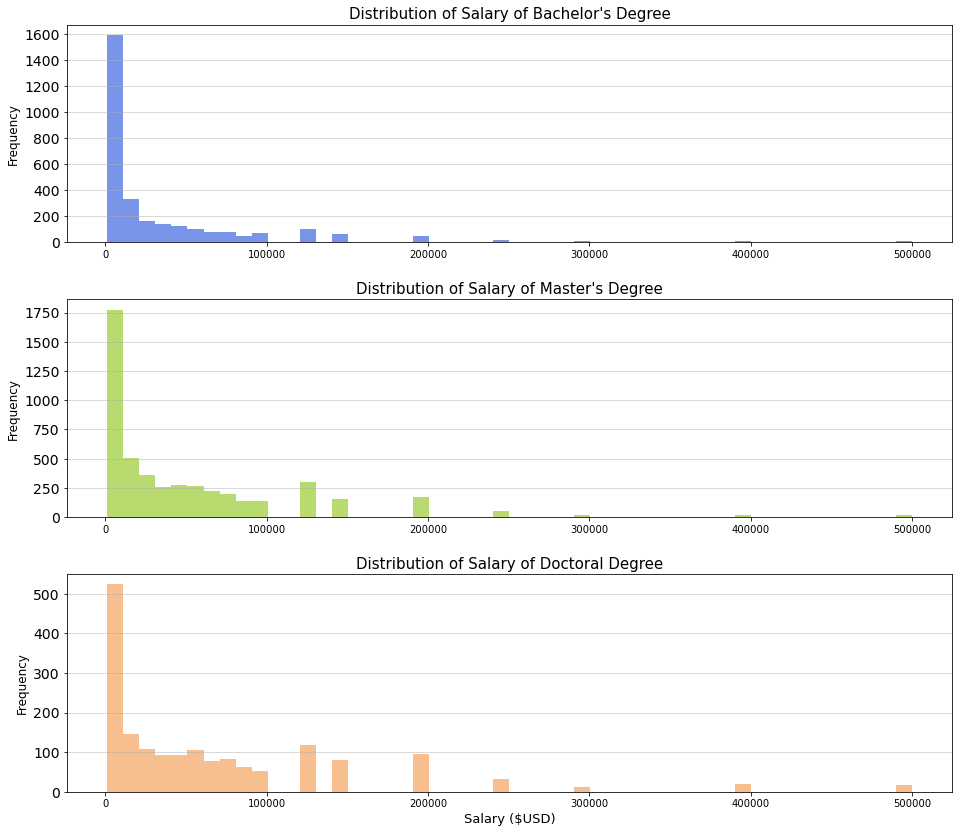

In [21]:
# Plotting to check for normality
fig,ax = plt.subplots(3, sharex=False, figsize=(14,12))
ax[0].hist(bach_df['Q24'], bins=50, alpha=0.7, rwidth=1,
                color = 'royalblue')
ax[1].hist(master_df['Q24'], bins=50, alpha=0.7, rwidth=1,
                color = 'yellowgreen')
ax[2].hist(doc_df['Q24'], bins=50, alpha=0.7, rwidth=1,
                color = 'sandybrown')
fig.tight_layout(pad=4.0)

#Formatting plot area
ax[0].grid(axis='y', alpha=0.6)
ax[1].grid(axis='y', alpha=0.6)
ax[2].grid(axis='y', alpha=0.6)
ax[0].set_ylabel("Frequency", fontsize=12)
ax[1].set_ylabel("Frequency", fontsize=12)
ax[2].set_ylabel("Frequency", fontsize=12)
plt.rc('ytick',labelsize=12)
plt.xlabel("Salary ($USD)", fontsize=13)
ax[0].set_title("Distribution of Salary of Bachelor's Degree", fontsize = 15)
ax[1].set_title("Distribution of Salary of Master's Degree", fontsize = 15)
ax[2].set_title("Distribution of Salary of Doctoral Degree", fontsize = 15)

plt.show() 

It is deemed that an ANOVA test is not suitable here because the one-way ANOVA test assumes normality and homogeneity of variance. 

As shown in the histograms above, the data are not normally distributed but skewed towards the left. 

Moreover, using the Levene test (demonstrated below), it is found that no homogeneity exists among the variance of these three groups.

In conclusion, since the above conditions are not met, it is deemed that a one-way ANOVA test is not suitable here.

In [22]:
# Checking variance homogeneity using Levene test with a 0.05 confidence level

w_sal_1, p_sal_1 = stats.levene(bach_df['Q24'], master_df['Q24'], doc_df['Q24'])

print ("\nLevene test: W = %g  p = %g" % (w_sal_1, p_sal_1))

if p_sal_1 < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of the salary of Bachelor's, Master's and Doctoral degree.")
      


Levene test: W = 90.8593  p = 8.1069e-40

Since the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of the salary of Bachelor's, Master's and Doctoral degree.


c. Bootstrap your data for comparing the mean of salary for men and women. Use 1000 replications. Plot three bootstrap distributions (for Bachelor's degree, Master's degree, Doctoral degree) and the distribution of the differences in mean. 

In [23]:
# Define empty arrays to store the mean values of bootstrap samples
boot_means_bach = []
boot_means_master = []
boot_means_doc = []

boot_med_bach = []
boot_med_master = []
boot_med_doc = []

np.random.seed(0)

for num in range(1000):
    bootsample_bach = np.random.choice(bach_df['Q24'], size=len(bach_df['Q24']), replace=True)
    bootsample_master = np.random.choice(master_df['Q24'], size=len(master_df['Q24']), replace=True)
    bootsample_doc = np.random.choice(doc_df['Q24'], size=len(doc_df['Q24']), replace=True)
    
    boot_means_bach.append(bootsample_bach.mean())
    boot_means_master.append(bootsample_master.mean())
    boot_means_doc.append(bootsample_doc.mean())
    
    boot_med_bach.append(np.median(bootsample_bach))
    boot_med_master.append(np.median(bootsample_master))
    boot_med_doc.append(np.median(bootsample_doc))


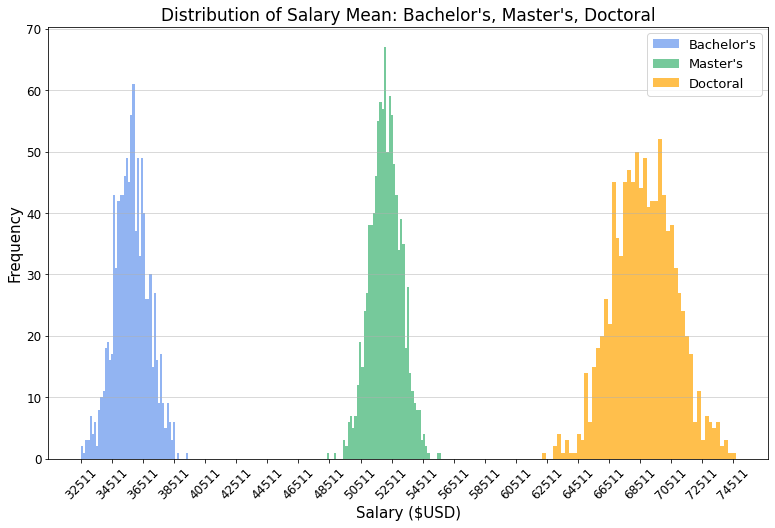

In [24]:
# Plotting the distribution of the means of Bachelor's degree, Master's degree and Doctoral degree

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.hist(boot_means_bach, bins=50, alpha=0.7, rwidth=1,
                color = 'cornflowerblue', label="Bachelor's")
ax.hist(boot_means_master, bins=50, alpha=0.7, rwidth=1,
                color = 'mediumseagreen', label="Master's")
ax.hist(boot_means_doc, bins=50, alpha=0.7, rwidth=1,
                color = 'orange', label="Doctoral")

#Formatting plot area
ax.grid(axis='y', alpha=0.6)
ax.set_ylabel("Frequency", fontsize=15)
ax.legend(loc="upper right", fontsize=13)
plt.xticks(np.arange(min(boot_means_bach), max(boot_means_doc), 2000), fontsize=12, rotation=45)
plt.rc('ytick',labelsize=14)
plt.xlabel("Salary ($USD)", fontsize=15)
plt.title("Distribution of Salary Mean: Bachelor's, Master's, Doctoral", fontsize=17)

plt.show() 

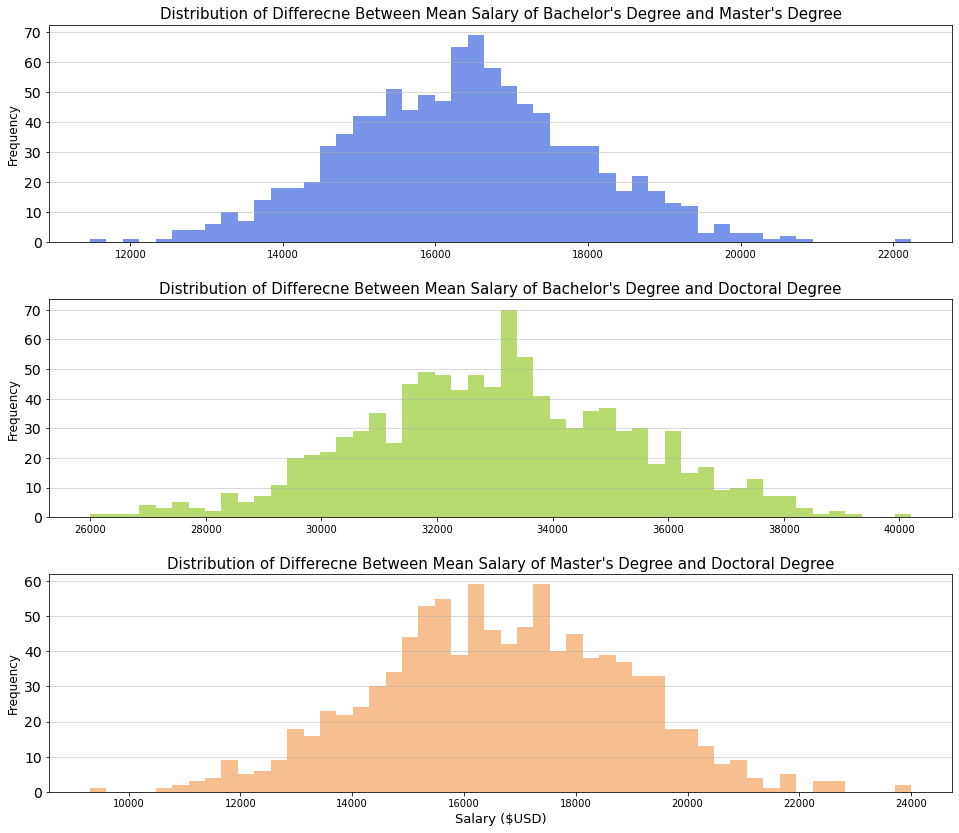

In [25]:
# Plot the difference in salary mean between each group

# Convert the output to array
boot_means_bach_arr = np.array(boot_means_bach).reshape(-1,1)
boot_means_master_arr = np.array(boot_means_master).reshape(-1,1)
boot_means_doc_arr = np.array(boot_means_doc).reshape(-1,1)

# Determine the difference in salary mean between each group
dif_master_bach = boot_means_master_arr - boot_means_bach_arr
dif_doc_bach = boot_means_doc_arr - boot_means_bach_arr
dif_doc_master = boot_means_doc_arr - boot_means_master_arr

# Plotting
fig,ax = plt.subplots(3, sharex=False, figsize=(14,12))
ax[0].hist(dif_master_bach, bins=50, alpha=0.7, rwidth=1,
                color = 'royalblue')
ax[1].hist(dif_doc_bach, bins=50, alpha=0.7, rwidth=1,
                color = 'yellowgreen')
ax[2].hist(dif_doc_master, bins=50, alpha=0.7, rwidth=1,
                color = 'sandybrown')
fig.tight_layout(pad=4.0)

#Formatting plot area
ax[0].grid(axis='y', alpha=0.6)
ax[1].grid(axis='y', alpha=0.6)
ax[2].grid(axis='y', alpha=0.6)
ax[0].set_ylabel("Frequency", fontsize=12)
ax[1].set_ylabel("Frequency", fontsize=12)
ax[2].set_ylabel("Frequency", fontsize=12)
plt.rc('ytick',labelsize=12)
plt.xlabel("Salary ($USD)", fontsize=13)
ax[0].set_title("Distribution of Differecne Between Mean Salary of Bachelor's Degree and Master's Degree", fontsize = 15)
ax[1].set_title("Distribution of Differecne Between Mean Salary of Bachelor's Degree and Doctoral Degree", fontsize = 15)
ax[2].set_title("Distribution of Differecne Between Mean Salary of Master's Degree and Doctoral Degree", fontsize = 15)

plt.show() 

d. If suitable, perform an ANOVA on the bootstrapped data. Explain your rationale.

In [26]:
# Checking variance homogeneity using Levene test with a 0.05 confidence level

w_sal_2, p_sal_2 = stats.levene(boot_means_bach, boot_means_master, boot_means_doc)

print ("\nLevene test: W = %g  p = %g" % (w_sal_2, p_sal_2))

if p_sal_2 < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of salary mean of Bachelor's, Master's and Doctoral degree.")
      


Levene test: W = 265.354  p = 7.89628e-107

Since the calculated p value is smaller than the threshold (0.05), we conclude that no homogeneity exists between the variance of salary mean of Bachelor's, Master's and Doctoral degree.


It is deemed that an ANOVA test is not suitable here. Althought the bootstrapped data display normality, as can be seen from the histograms, no homogeneity is found among the variance of the salary mean of these three groups. Therefore, the assumption of homogeneity of variance cannot be met. 

Instead, the non-parametric ANOVA, Kruskal-Wallis h-test is used, since it does not assume equal variance but does not assume any specific distributino either.

In [27]:
# Using Kruskal-Wallis H-test

Fc_krusk, pc_krusk = stats.kruskal(bach_df['Q24'], master_df['Q24'], doc_df['Q24'])
print ("One-way ANOVA: F = %g  p = %g" % (Fc_krusk, pc_krusk))

if pc_krusk < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that the mean salaries of the Bachelor's degree, Master's degree and Doctoral degree are different.")
    

One-way ANOVA: F = 354.125  p = 1.2669e-77

Since the calculated p value is smaller than the threshold (0.05), we conclude that the mean salaries of the Bachelor's degree, Master's degree and Doctoral degree are different.


Because the distribution of bootstrapped data seems to display normality, as shown in the histograms above, Welch's ANOVA is also performed because it assumes normality and unequal variance. Welch's ANOVA is performed here to provide more insights into the mean salaries of Bachelor's, Master's and Doctoral degree. 

In [28]:
# Install pingouin module which contains Welch's ANOVA test

!pip install pingouin
from pingouin import welch_anova

In [29]:
# Putting bootstrapped data into a data frame for Welch's ANOVA test's input
boot_means_bach_df = pd.DataFrame(data=boot_means_bach, columns=["Salary Mean"])
boot_means_bach_df['Group']="Bachelor's Degree"

boot_means_master_df = pd.DataFrame(data=boot_means_master, columns=["Salary Mean"])
boot_means_master_df['Group']="Master's Degree"

boot_means_doc_df = pd.DataFrame(data=boot_means_doc, columns=["Salary Mean"])
boot_means_doc_df['Group']="Doctoral Degree"

aov_df = boot_means_bach_df.append(boot_means_master_df)
aov_df = aov_df.append(boot_means_doc_df)
aov_df

,Salary Mean,Group
0,36719.548623,Bachelor's Degree
1,35072.685032,Bachelor's Degree
2,34803.684036,Bachelor's Degree
3,35658.645868,Bachelor's Degree
4,35988.715566,Bachelor's Degree
...,...,...
995,69836.437718,Doctoral Degree
996,70877.473807,Doctoral Degree
997,68970.314319,Doctoral Degree
998,69937.136205,Doctoral Degree


In [30]:
# Perform Welch's ANOVA test, with the dependent variable being salary, and the between factor being the three degrees

Wel_Aov = welch_anova(data=aov_df, dv='Salary Mean', between='Group')
Wel_Aov

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,1899.154165,122776.845494,0.0,0.988668


In [31]:
if Wel_Aov['p-unc'][0] < 0.05:
    print("\nSince the calculated p value is smaller than the threshold (0.05), we conclude that the mean salaries of the Bachelor's degree, Master's degree and Doctoral degree are different.")
    


Since the calculated p value is smaller than the threshold (0.05), we conclude that the mean salaries of the Bachelor's degree, Master's degree and Doctoral degree are different.


e. The p value for the two Levene tests are both smaller than 0.05, therefore H0 for each test is rejected and we conclude that no homogeneity exists between the variances of salaries of men and women, and between the variances of salary means of men and women. Thus, a non-parametric ANOVA, Kruskal-Wallis h-test, is performed on bootstrapped data because this test does not assume equal variances. However, it does not assume any specific data distribution either. The resulting p value for Kruskal-Wallis h-test is 1.2669e-77 (p<0.05), indicating that H0, that the salary means of individuals with a Bachelor's degree, a Master's degree and a Doctoral degree belong to the same distribution, should be rejected. To provide more insights, a Welch's ANOVA is performed on the bootstrapped data, because this test does not assume equal variances, but it does assume normality. Since the bootstrapped data display normality as shown in the histograms, a Welch's ANOVA is deemed suitable here. The test results a p value of 0, confirming that H0, that the salary means of individuals with a Bachelor's degree, a Master's degree and a Doctoral degree belong to the same distribution, should be rejected. In other words, individuals with a Bachelor's degree, a Master's degree and a Doctoral degree in the field of data science earn different average salaries. Based on the histograms, individuals with a Doctoral degree earns the highest salaries, followed by a Master's degree and then a Bachelor's degree. 

In conclusion, level of education does have an effect on the average salaries of individuals in the field of data science and higher education usually leads to better pay.